# Assignment 3.1 [Python & R]

## University of San Diego

## ADS 502

## Dingyi Duan

#### For Exercises 28–34, work with the churn data set.


#### 28. Partition the data set, so that 67% of the records are included in the training data set and 33% are included in the test data set. Use a bar graph to confirm your proportions.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

#### Python Packages

In [3]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt



from sklearn.tree import DecisionTreeClassifier, export_graphviz
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

#### R Package

In [4]:
%%R
library(readr)
library(ggplot2)
library(C50)
library(e1071)

### Python

In [5]:
churn_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/churn")

In [6]:
churn_py.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False


In [7]:
churn_train_py, churn_test_py = train_test_split(churn_py, test_size = 0.33, random_state = 7)

In [8]:
print ('churn_train_py has %s records'% churn_train_py.shape[0],
       '\nchurn_test_py has %s records'% churn_test_py.shape[0])

churn_train_py has 2233 records 
churn_test_py has 1100 records


In [9]:
print ('The proportion for churn_train_py is %s'% round(churn_train_py.shape[0]*100/churn_py.shape[0],0),
       '\nThe proportion for churn_test_py is %s'% round(churn_test_py.shape[0]*100/churn_py.shape[0],0))

The proportion for churn_train_py is 67.0 
The proportion for churn_test_py is 33.0


<BarContainer object of 2 artists>

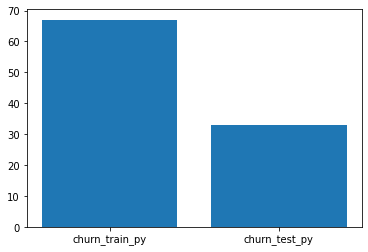

In [10]:
names_py = ['churn_train_py', 'churn_test_py']
values_pct_py = [round(churn_train_py.shape[0]*100/churn_py.shape[0],0),round(churn_test_py.shape[0]*100/churn_py.shape[0],0)]
plt.bar(names_py, values_pct_py)

### R

In [11]:
%%R
churn_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/churn")
set.seed(7)
n <- dim(churn_r)[1]
head(churn_r)

  State Account.Length Area.Code    Phone Intl.Plan VMail.Plan VMail.Message
1    KS            128       415 382-4657        no        yes            25
2    OH            107       415 371-7191        no        yes            26
3    NJ            137       415 358-1921        no         no             0
4    OH             84       408 375-9999       yes         no             0
5    OK             75       415 330-6626       yes         no             0
6    AL            118       510 391-8027       yes         no             0
  Day.Mins Day.Calls Day.Charge Eve.Mins Eve.Calls Eve.Charge Night.Mins
1    265.1       110      45.07    197.4        99      16.78      244.7
2    161.6       123      27.47    195.5       103      16.62      254.4
3    243.4       114      41.38    121.2       110      10.30      162.6
4    299.4        71      50.90     61.9        88       5.26      196.9
5    166.7       113      28.34    148.3       122      12.61      186.9
6    223.4        98   

In [12]:
%%R
train_ind <- runif(dim(churn_r)[1]) <= 0.67 # Determin training data proportion

In [13]:
%%R
# Split training and test datasets
churn_train_r <- churn_r[ train_ind, ] 
churn_test_r <- churn_r[ !train_ind, ]

In [14]:
%%R
dim(churn_train_r)[1]

[1] 2227


In [15]:
%%R
dim(churn_test_r)[1]

[1] 1106


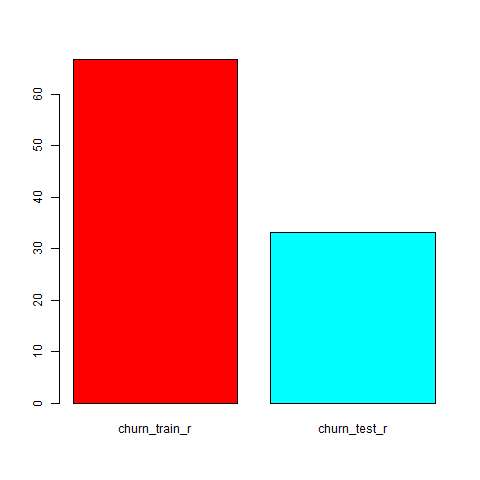

In [16]:
%%R
values_pct_r <- c((dim(churn_train_r)[1])*100/dim(churn_r)[1],(dim(churn_test_r)[1])*100/dim(churn_r)[1])
names_r <- c("churn_train_r","churn_test_r")
barplot(values_pct_r,names.arg=names_r,col = rainbow(2))

#### 29. Identify the total number of records in the training data set and how many records in the training data set have a churn value of true.

### Python

In [17]:
print('Total number of records in the training data set is ',churn_train_py.shape[0])

Total number of records in the training data set is  2233


In [18]:
print('Number of records in the training data set have a churn value of true is ',churn_train_py['Churn'].sum())

Number of records in the training data set have a churn value of true is  320


In [19]:
# Or
churn_train_py['Churn'].value_counts()

False    1913
True      320
Name: Churn, dtype: int64

### R

In [20]:
%%R
n_train_r <- dim(churn_train_r)[1]
print(paste('Total number of records in the training data set is ',n_train_r))

[1] "Total number of records in the training data set is  2227"


In [21]:
%%R
a <- table(churn_train_r$Churn)["True"]
print(paste('Number of records in the training data set have a churn value of true is ',a))

[1] "Number of records in the training data set have a churn value of true is  325"


In [22]:
%%R
# Or
table(churn_train_r$Churn)


False  True 
 1902   325 


#### 30. Use your answers from the previous exercise to calculate how many true churn records you need to resample in order to have 20% of the rebalanced data set have true churn values.

### Python

In [23]:
# Ratio of "True" to all Churn in churn_train
churn_train_py['Churn'].sum()*100 / churn_train_py.shape[0]

14.33049708911778

Toal churn_train has 2233, Churn == 'True' has 320, which is 14.3% of all samles;
We need 20%.

In [24]:
print('We need %s records with Churn == True to add to our training set' % int((0.2*(2233)-320)/0.8))

We need 158 records with Churn == True to add to our training set


### R

In [25]:
%%R

print(paste('Current ratio of "Churn == True" to all training set is ', a*100/n_train_r))

[1] "Current ratio of \"Churn == True\" to all training set is  14.5936237090256"


In [26]:
%%R

# We need 20%
print(paste('The number of Churn == True we still need:', floor((0.2*(2233)-320)/0.8)))

[1] "The number of Churn == True we still need: 158"


#### 31. Perform the rebalancing described in the previous exercise and confirm that 20% of the records in the rebalanced data set have true churn values.

### Python

In [27]:
to_resample_py = churn_train_py.loc[churn_train_py['Churn'] == True]

In [28]:
# Sample from our records of interest

In [29]:
our_resample_py = to_resample_py.sample(n = 158, replace = True) 

In [30]:
# Add the resampled records to our original training data set

In [31]:
churn_train_rebal_py = pd.concat([churn_train_py, our_resample_py], axis=0)

In [32]:
churn_train_rebal_py['Churn'].sum() #The current Churn == True records

478

In [33]:
# Or
churn_train_rebal_py['Churn'].value_counts()

False    1913
True      478
Name: Churn, dtype: int64

In [34]:
# Proportion of our desired records in the new (rebalanced) train data set

In [35]:
round(churn_train_rebal_py['Churn'].sum()*100/churn_train_rebal_py.shape[0],2) 

19.99

### R

In [36]:
%%R
# Identify the record indices we want to resample using which()
to.resample_r <- which(churn_train_r$Churn == 'True')

In [37]:
%%R
# Randomly sample from the values in to.resample
our.resample_r <- sample(x = to.resample_r, size = 158, replace = TRUE)

In [38]:
%%R
# Get the records whose record numbers are those in our.resample
our.resample_r <- churn_train_r[our.resample_r,]

In [39]:
%%R
# Add the resampled records back onto our original training data set
churn_train_rebal_r <- rbind(churn_train_r, our.resample_r)

In [40]:
%%R
t1 <- table(churn_train_rebal_r$Churn)
#ratio <- t1[2] / sum(t1) * 100
t1


False  True 
 1902   483 


In [41]:
%%R
# Now the new ratio of Churn == True
t1['True']*100/dim(churn_train_rebal_r)[1]

    True 
20.25157 


#### 32. Which baseline model do we use to compare our classification model performance against? To which value does this baseline model assign all predictions? What is the accuracy of this baseline model?

Answer: For binary classification, we use All Positive Model or All Negative Model. 

All Positive Model assigns all predictors to positive values; All Negative Model assigns all predictors to negative values. 

The accuracy for All Positive Model will be p which is 14% from our test data set; The accuracy for All Negative Model will be 1-p which will be 86%.

#### 33. Validate your partition by testing for the difference in mean day minutes for the training set versus the test set.

### Python

In [42]:
# Before rebalance in train data set
mean_day_mins_train_before_py = churn_train_py['Day Mins'].sum() / churn_train_py.shape[0]
mean_day_mins_train_before_py


179.75302283922974

In [43]:
# Mean days min in test set
mean_day_mins_test_py = churn_test_py['Day Mins'].sum() / churn_test_py.shape[0]
mean_day_mins_test_py

179.81990909090908

Means are very similar, so running t-test

In [44]:
# Two samples t test
np.var(churn_test_py['Day Mins']), np.var(churn_train_py['Day Mins'])

(3010.977976355374, 2943.552898385955)

In [45]:
# Perform two sample t-test with equal variances
stats.ttest_ind(a=churn_test_py['Day Mins'], b=churn_train_py['Day Mins'], equal_var=True)


Ttest_indResult(statistic=0.03333175951101492, pvalue=0.9734120244442176)

p-value = 0.973 which is greater than 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean day minutes between the two data sets are different.

### R

In [46]:
%%R
# Before rebalance in train data set
mean_day_mins_train_before_r <- sum(churn_train_r$Day.Mins) / dim(churn_train_r)[1]
mean_day_mins_train_before_r

[1] 180.911


In [47]:
%%R
# After rebalance in train data set
mean_day_mins_train_rebal_r <- sum(churn_train_rebal_r$Day.Mins) / dim(churn_train_rebal_r)[1]
mean_day_mins_train_rebal_r

[1] 182.5936


In [48]:
%%R
# Mean days min in test set
mean_day_mins_test_r <- sum(churn_test_r$Day.Mins) / dim(churn_test_r)[1]
mean_day_mins_test_r

[1] 177.4879


In [49]:
%%R
# t-test
t.test(churn_test_r$Day.Mins,churn_train_r$Day.Mins)



	Welch Two Sample t-test

data:  churn_test_r$Day.Mins and churn_train_r$Day.Mins
t = -1.7248, df = 2259.7, p-value = 0.08471
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.315115  0.468881
sample estimates:
mean of x mean of y 
 177.4879  180.9110 



p-value = 0.085 which is greater than 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean day minutes between the two data sets are different.

#### 34. Validate your partition by testing for the difference in proportion of true churn records for the training set versus the test set.

### Python

In [50]:
# Ratio of "True" to all Churn in churn_train before rebalance
print(churn_train_py['Churn'].sum()*100 / churn_train_py.shape[0])

14.33049708911778


In [51]:
# Ratio of "True" to all Churn in churn_test
print(churn_test_py['Churn'].sum()*100 / churn_test_py.shape[0])

14.818181818181818


Two proportions are similar, running one proportion z-test

In [52]:
# Perform one proportion z-test
proportions_ztest(count=churn_train_py['Churn'].sum(), nobs=churn_train_py.shape[0], value=churn_test_py['Churn'].sum() / churn_test_py.shape[0])

(-0.6577180599814599, 0.5107193152727614)

p-value = 0.51 which is greater than 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the proportion of true churn records between the two data sets are different.

### R

In [53]:
%%R
# Ratio of "True" to all Churn in churn_train before rebalance

table(churn_train_r$Churn)["True"]*100 / dim(churn_train_r)[1]

    True 
14.59362 


In [54]:
%%R
# Ratio of "True" to all Churn in churn_test 

table(churn_test_r$Churn)["True"]*100 / dim(churn_test_r)[1]


    True 
14.28571 


In [55]:
%%R
# t-test
prop.test(c(table(churn_test_r$Churn)["True"],table(churn_train_r$Churn)["True"]),c(dim(churn_test_r)[1],dim(churn_train_r)[1]))


	2-sample test for equality of proportions with continuity correction

data:  c(table(churn_test_r$Churn)["True"], table(churn_train_r$Churn)["True"]) out of c(dim(churn_test_r)[1], dim(churn_train_r)[1])
X-squared = 0.034423, df = 1, p-value = 0.8528
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.02905977  0.02290158
sample estimates:
   prop 1    prop 2 
0.1428571 0.1459362 



p-value = 0.85 which is greater than 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the proportion of true churn records between the two data sets are different.

#### For the following exercises, work with the adult_ch6_training and adult_ch6_test data sets. Use R to solve each problem.

### Python

In [56]:
adult_train_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_training")
adult_test_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_test")

print(adult_train_py.head())
print(adult_test_py.head())

  Marital status Income  Cap_Gains_Losses
0  Never-married  <=50K           0.02174
1       Divorced  <=50K           0.00000
2        Married  <=50K           0.00000
3        Married  <=50K           0.00000
4        Married  <=50K           0.00000
  Marital status Income  Cap_Gains_Losses
0        Married  <=50K          0.000000
1        Married   >50K          0.051781
2  Never-married  <=50K          0.000000
3       Divorced   >50K          0.000000
4        Married   >50K          0.000000


### R

In [125]:
%%R
adult_train_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_training")
adult_test_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/adult_ch6_test")

print(head(adult_train_r))
print(head(adult_test_r))

  Marital.status Income Cap_Gains_Losses
1  Never-married  <=50K          0.02174
2       Divorced  <=50K          0.00000
3        Married  <=50K          0.00000
4        Married  <=50K          0.00000
5        Married  <=50K          0.00000
6        Married   >50K          0.00000
  Marital.status Income Cap_Gains_Losses
1        Married  <=50K         0.000000
2        Married   >50K         0.051781
3  Never-married  <=50K         0.000000
4       Divorced   >50K         0.000000
5        Married   >50K         0.000000
6        Married  <=50K         0.000000


In [126]:
%%R
# Change categorical attributes to factors
adult_train_r$Income <- factor(adult_train_r$Income)
adult_train_r$Marital.status <- factor(adult_train_r$Marital.status)


    [1] Never-married Divorced      Married       Married       Married      
    [6] Married       Never-married Married       Married       Never-married
   [11] Never-married Married       Married       Never-married Never-married
   [16] Married       Married       Separated     Married       Married      
   [21] Divorced      Married       Never-married Married       Divorced     
   [26] Married       Never-married Divorced      Married       Married      
   [31] Never-married Married       Married       Married       Married      
   [36] Married       Married       Married       Never-married Married      
   [41] Never-married Divorced      Divorced      Married       Married      
   [46] Married       Married       Married       Married       Married      
   [51] Married       Divorced      Married       Divorced      Married      
   [56] Never-married Never-married Married       Never-married Married      
   [61] Never-married Married       Married       Never-married 

  [526] Married       Divorced      Divorced      Married       Never-married
  [531] Married       Divorced      Divorced      Separated     Never-married
  [536] Never-married Married       Never-married Married       Married      
  [541] Married       Never-married Married       Married       Never-married
  [546] Married       Married       Married       Never-married Widowed      
  [551] Married       Never-married Never-married Never-married Never-married
  [556] Married       Married       Never-married Never-married Married      
  [561] Married       Never-married Never-married Never-married Married      
  [566] Never-married Married       Never-married Never-married Married      
  [571] Married       Never-married Married       Married       Never-married
  [576] Never-married Separated     Never-married Divorced      Divorced     
  [581] Married       Married       Never-married Married       Never-married
  [586] Married       Never-married Married       Never-married 

 [1051] Never-married Never-married Married       Never-married Divorced     
 [1056] Married       Married       Married       Never-married Married      
 [1061] Married       Divorced      Divorced      Never-married Never-married
 [1066] Married       Never-married Married       Divorced      Married      
 [1071] Married       Married       Married       Married       Married      
 [1076] Married       Married       Divorced      Widowed       Never-married
 [1081] Married       Married       Divorced      Widowed       Married      
 [1086] Married       Never-married Divorced      Married       Married      
 [1091] Divorced      Never-married Married       Never-married Never-married
 [1096] Married       Never-married Married       Divorced      Never-married
 [1101] Never-married Married       Never-married Married       Married      
 [1106] Never-married Divorced      Divorced      Married       Married      
 [1111] Married       Never-married Married       Divorced      

 [1576] Married       Married       Married       Separated     Married      
 [1581] Never-married Never-married Divorced      Divorced      Widowed      
 [1586] Never-married Married       Never-married Never-married Never-married
 [1591] Never-married Never-married Never-married Never-married Married      
 [1596] Married       Separated     Divorced      Never-married Never-married
 [1601] Married       Never-married Never-married Divorced      Never-married
 [1606] Married       Widowed       Widowed       Widowed       Divorced     
 [1611] Married       Married       Never-married Married       Never-married
 [1616] Never-married Married       Widowed       Married       Married      
 [1621] Married       Never-married Never-married Married       Never-married
 [1626] Divorced      Separated     Married       Separated     Married      
 [1631] Married       Married       Married       Divorced      Married      
 [1636] Married       Married       Married       Married       

 [2101] Married       Married       Never-married Married       Never-married
 [2106] Divorced      Never-married Married       Married       Married      
 [2111] Married       Married       Never-married Never-married Divorced     
 [2116] Married       Married       Divorced      Married       Married      
 [2121] Married       Never-married Married       Married       Never-married
 [2126] Married       Never-married Divorced      Never-married Never-married
 [2131] Never-married Married       Married       Divorced      Married      
 [2136] Divorced      Never-married Never-married Married       Divorced     
 [2141] Married       Married       Never-married

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Never-married
 [3521] Married       Never-married Widowed       Divorced      Never-married
 [3526] Never-married Never-married Never-married Never-married Never-married
 [3531] Never-married Married       Married       Never-married Widowed      
 [3536] Never-married Married       Married       Married       Married      
 [3541] Married       Married       Married       Married       Never-married
 [3546] Widowed       Divorced      Married       Never-married Divorced     
 [3551] Divorced      Married       Married       Never-married Married      
 [3556] Never-married Never-married Married       Divorced      Never-married
 [3561] Never-married Never-married Married       Never-married Never-married
 [3566] Married       Separated     Married       Never-married Married      
 [3571] Married       Married       Married       Divorced      Married      
 [3576] Married       Married       Never-married Married       Never-married
 [3581] Never-married Never-married Married      

 [4041] Married       Divorced      Married       Widowed       Never-married
 [4046] Divorced      Married       Never-married Married       Married      
 [4051] Married       Married       Married       Never-married Divorced     
 [4056] Never-married Married       Never-married Married       Married      
 [4061] Divorced      Married       Married       Divorced      Divorced     
 [4066] Never-married Never-married Married       Divorced      Never-married
 [4071] Married       Married       Never-married Never-married Never-married
 [4076] Never-married Separated     Divorced      Married       Married      
 [4081] Married       Never-married Never-married Married       Divorced     
 [4086] Divorced      Never-married Never-married Never-married Divorced     
 [4091] Widowed       Never-married Married       Married       Never-married
 [4096] Married       Married       Married       Never-married Never-married
 [4101] Married       Divorced      Married       Married       

 [4566] Married       Divorced      Married       Never-married Widowed      
 [4571] Married       Never-married Never-married Married       Never-married
 [4576] Married       Married       Never-married Married       Married      
 [4581] Married       Never-married Married       Widowed       Never-married
 [4586] Divorced      Divorced      Never-married Married       Divorced     
 [4591] Married       Married       Divorced      Married       Never-married
 [4596] Married       Married       Married       Divorced      Married      
 [4601] Divorced      Never-married Married       Married       Separated    
 [4606] Never-married Never-married Never-married Divorced      Never-married
 [4611] Never-married Never-married Married       Separated     Married      
 [4616] Never-married Divorced      Widowed       Married       Married      
 [4621] Divorced      Married       Never-married Married       Married      
 [4626] Married       Married       Married       Married       

 [5091] Never-married Married       Never-married Never-married Never-married
 [5096] Never-married Married       Never-married Never-married Divorced     
 [5101] Married       Married       Never-married Married       Divorced     
 [5106] Widowed       Divorced      Never-married Divorced      Separated    
 [5111] Never-married Married       Married       Never-married Never-married
 [5116] Divorced      Never-married Married       Married       Married      
 [5121] Divorced      Never-married Divorced      Never-married Married      
 [5126] Divorced      Widowed       Married       Married       Divorced     
 [5131] Separated     Married       Never-married Married       Married      
 [5136] Married       Married       Widowed       Married       Divorced     
 [5141] Married       Never-married Never-married Never-married Married      
 [5146] Separated     Married       Never-married Divorced      Married      
 [5151] Married       Never-married Never-married Never-married 

 [5616] Married       Married       Separated     Married       Separated    
 [5621] Married       Married       Never-married Married       Separated    
 [5626] Never-married Married       Divorced      Never-married Married      
 [5631] Never-married Married       Divorced      Divorced      Never-married
 [5636] Divorced      Married       Married       Widowed       Widowed      
 [5641] Never-married Married       Married       Married       Married      
 [5646] Married       Married       Never-married Married       Married      
 [5651] Never-married Divorced      Never-married Married       Married      
 [5656] Never-married Never-married Married       Separated     Married      
 [5661] Married      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Never-married Married       Married       Married       Separated    
 [6881] Married       Married       Married       Married       Never-married
 [6886] Married       Married       Never-married Married       Married      
 [6891] Married       Married       Married       Separated     Never-married
 [6896] Married       Widowed       Never-married Never-married Married      
 [6901] Married       Never-married Married       Never-married Married      
 [6906] Married       Never-married Separated     Divorced      Never-married
 [6911] Married       Married       Widowed       Never-married Married      
 [6916] Married       Never-married Married       Never-married Married      
 [6921] Never-married Separated     Never-married Married       Married      
 [6926] Married       Married       Divorced      Married       Divorced     
 [6931] Never-married Married       Never-married Divorced      Married      
 [6936] Married       Divorced      Separated     Never-married Never-m

 [7401] Married       Never-married Divorced      Never-married Married      
 [7406] Never-married Separated     Married       Widowed       Never-married
 [7411] Never-married Married       Married       Married       Never-married
 [7416] Married       Never-married Never-married Widowed       Married      
 [7421] Never-married Married       Married       Married       Divorced     
 [7426] Widowed       Married       Divorced      Never-married Divorced     
 [7431] Married       Divorced      Married       Divorced      Married      
 [7436] Divorced      Never-married Married       Married       Separated    
 [7441] Married       Divorced      Married       Married       Married      
 [7446] Never-married Widowed       Never-married Married       Married      
 [7451] Married       Married       Married       Married       Divorced     
 [7456] Never-married Divorced      Married       Married       Never-married
 [7461] Divorced      Never-married Never-married Married       

 [7926] Married       Separated     Married       Never-married Married      
 [7931] Never-married Married       Married       Never-married Never-married
 [7936] Divorced      Never-married Separated     Widowed       Married      
 [7941] Separated     Married       Married       Divorced      Married      
 [7946] Married       Never-married Never-married Married       Never-married
 [7951] Married       Never-married Married       Never-married Married      
 [7956] Never-married Never-married Married       Married       Married      
 [7961] Never-married Married       Married       Never-married Married      
 [7966] Married       Never-married Married       Married       Divorced     
 [7971] Married       Married       Married       Separated     Married      
 [7976] Married       Married       Married       Never-married Married      
 [7981] Married       Never-married Married       Never-married Married      
 [7986] Never-married Married       Never-married Married       

 [8451] Never-married Divorced      Married       Never-married Married      
 [8456] Married       Married       Never-married Divorced      Married      
 [8461] Never-married Divorced      Married       Divorced      Married      
 [8466] Never-married Never-married Divorced      Married       Married      
 [8471] Married       Divorced      Never-married Never-married Married      
 [8476] Separated     Never-married Married       Never-married Married      
 [8481] Married       Married       Never-married Never-married Married      
 [8486] Married       Divorced      Never-married Never-married Married      
 [8491] Married       Never-married Never-married Never-married Married      
 [8496] Divorced      Never-married Married       Married       Widowed      
 [8501] Never-married Married       Married       Never-married Married      
 [8506] Never-married Married       Never-married Never-married Married      
 [8511] Never-married Divorced      Married       Never-married 

 [8976] Married       Married       Widowed       Never-married Married      
 [8981] Married       Divorced      Divorced      Married       Never-married
 [8986] Married       Married       Never-married Married       Married      
 [8991] Never-married Married       Divorced      Married       Never-married
 [8996] Never-married Married       Never-married Never-married Never-married
 [9001] Never-married Married       Married       Never-married Married      
 [9006] Married       Never-married Married       Married       Divorced     
 [9011] Married       Married       Never-married Never-married Married      
 [9016] Married       Divorced      Married       Married      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Married      
[10296] Married       Never-married Married       Divorced      Married      
[10301] Never-married Divorced      Married       Never-married Never-married
[10306] Married       Married       Married       Married       Never-married
[10311] Married       Married       Never-married Never-married Never-married
[10316] Married       Divorced      Married       Married       Never-married
[10321] Never-married Widowed       Married       Divorced      Married      
[10326] Married       Married       Never-married Married       Married      
[10331] Never-married Never-married Never-married Never-married Married      
[10336] Never-married Never-married Married       Married       Married      
[10341] Married       Married       Divorced      Never-married Never-married
[10346] Never-married Never-married Never-married Married       Never-married
[10351] Married       Married       Divorced      Married       Never-married
[10356] Divorced      Never-married Widowed      

[10816] Married       Never-married Married       Never-married Married      
[10821] Married       Married       Never-married Never-married Married      
[10826] Never-married Never-married Divorced      Married       Married      
[10831] Never-married Married       Never-married Never-married Never-married
[10836] Married       Never-married Married       Never-married Never-married
[10841] Widowed       Married       Married       Married       Never-married
[10846] Never-married Married       Married       Divorced      Never-married
[10851] Married       Married       Never-married Married       Married      
[10856] Never-married Married       Never-married Married       Never-married
[10861] Never-married Married       Married       Married       Married      
[10866] Married       Never-married Never-married Married       Married      
[10871] Separated     Never-married Never-married Never-married Married      
[10876] Never-married Married       Never-married Married       

[11341] Married       Married       Never-married Never-married Married      
[11346] Divorced      Married       Widowed       Married       Married      
[11351] Divorced      Married       Never-married Married       Married      
[11356] Married       Divorced      Married       Widowed       Divorced     
[11361] Married       Married       Married       Married       Never-married
[11366] Never-married Married       Married       Separated     Never-married
[11371] Divorced      Never-married Married       Never-married Married      
[11376] Married       Married       Never-married Never-married Never-married
[11381] Married       Married       Separated     Never-married Married      
[11386] Never-married Divorced      Never-married Never-married Divorced     
[11391] Married       Married       Separated     Never-married Divorced     
[11396] Never-married Divorced      Never-married Separated     Married      
[11401] Married       Never-married Never-married Married       

[11866] Never-married Married       Never-married Married       Never-married
[11871] Never-married Never-married Divorced      Never-married Never-married
[11876] Divorced      Married       Never-married Divorced      Married      
[11881] Married       Never-married Married       Divorced      Married      
[11886] Married       Divorced      Never-married Married       Married      
[11891] Never-married Never-married Divorced      Married       Widowed      
[11896] Never-married Married       Married       Married       Never-married
[11901] Married       Never-married Divorced      Married       Married      
[11906] Married       Never-married Married       Divorced      Never-married
[11911] Divorced      Married       Never-married Never-married Married      
[11916] Never-married Never-married Married       Married       Married      
[11921] Never-married Married       Never-married Never-married Married      
[11926] Divorced      Married       Divorced      Married       

[12391] Never-married Divorced      Married       Never-married Never-married
[12396] Married       Never-married Married       Married       Divorced     
[12401] Married       Married       Never-married Married       Never-married
[12406] Married       Never-married Divorced      Married       Married      
[12411] Widowed       Never-married Married       Never-married Never-married
[12416] Never-married Married       Never-married Never-married Married      
[12421] Never-married Married       Married       Never-married Divorced     
[12426] Widowed       Widowed       Never-married Divorced      Never-married
[12431] Married       Married       Never-married Married       Married      
[12436] Married      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Married       Divorced     
[13816] Never-married Married       Never-married Married       Married      
[13821] Divorced      Married       Married       Widowed       Never-married
[13826] Divorced      Never-married Married       Never-married Never-married
[13831] Married       Never-married Never-married Divorced      Divorced     
[13836] Divorced      Married       Divorced      Married       Never-married
[13841] Married       Married       Never-married Married       Married      
[13846] Married       Married       Married       Never-married Married      
[13851] Never-married Married       Never-married Separated     Never-married
[13856] Married       Widowed       Divorced      Married       Never-married
[13861] Never-married Never-married Married       Never-married Married      
[13866] Divorced      Married       Married       Separated     Married      
[13871] Divorced      Married       Married       Never-married Never-married
[13876] Separated     Married      

[14336] Never-married Married       Never-married Widowed       Divorced     
[14341] Divorced      Married       Divorced      Divorced      Never-married
[14346] Married       Divorced      Separated     Married       Never-married
[14351] Married       Never-married Married       Married       Married      
[14356] Married       Widowed       Never-married Married       Married      
[14361] Married       Married       Never-married Never-married Married      
[14366] Widowed       Never-married Never-married Divorced      Never-married
[14371] Never-married Married       Never-married Never-married Never-married
[14376] Married       Married       Never-married Divorced      Married      
[14381] Married       Divorced      Married       Divorced      Married      
[14386] Married       Married       Married       Married       Widowed      
[14391] Never-married Married       Separated     Married       Divorced     
[14396] Married       Married       Never-married Married       

[14861] Married       Married       Never-married Married       Married      
[14866] Married       Never-married Married       Separated     Married      
[14871] Married       Married       Never-married Married       Divorced     
[14876] Married       Divorced      Married       Married       Never-married
[14881] Never-married Married       Widowed       Married       Never-married
[14886] Divorced      Married       Divorced      Married       Divorced     
[14891] Divorced      Married       Married       Married       Never-married
[14896] Divorced      Never-married Never-married Married       Married      
[14901] Divorced      Married       Married       Divorced      Divorced     
[14906] Never-married Married       Never-married Married       Never-married
[14911] Married       Never-married Married       Widowed       Never-married
[14916] Married       Divorced      Divorced      Never-married Never-married
[14921] Married       Divorced      Married       Never-married 

[15386] Married       Never-married Married       Never-married Never-married
[15391] Married       Married       Married       Divorced      Married      
[15396] Divorced      Married       Married       Divorced      Married      
[15401] Widowed       Married       Married       Never-married Never-married
[15406] Never-married Married       Married       Married       Divorced     
[15411] Married       Married       Married       Married       Married      
[15416] Married       Never-married Widowed       Married       Married      
[15421] Divorced      Married       Married       Married       Divorced     
[15426] Never-married Separated     Married       Married       Separated    
[15431] Divorced      Divorced      Married       Widowed       Married      
[15436] Separated     Never-married Married       Never-married Married      
[15441] Never-married Never-married Married       Married       Married      
[15446] Married       Divorced      Married       Married       

[15911] Married       Married       Never-married Divorced      Married      
[15916] Widowed       Married       Divorced      Married       Married      
[15921] Never-married Married       Married       Never-married Married      
[15926] Married       Married       Married       Divorced      Separated    
[15931] Never-married Separated     Never-married Married       Married      
[15936] Never-married Married       Married       Married       Married      
[15941] Married       Never-married Married       Married       Never-married
[15946] Married       Married       Never-married Married       Married      
[15951] Never-married Married       Married       Widowed       Married      
[15956]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Married       Never-married Married       Never-married Never-married
[17546] Married       Married       Never-married Married       Never-married
[17551] Never-married Never-married Never-married Never-married Married      
[17556] Married       Married       Married       Married       Never-married
[17561] Married       Married       Never-married Married       Divorced     
[17566] Never-married Married       Married       Widowed       Married      
[17571] Never-married Married       Married       Never-married Never-married
[17576] Never-married Married       Married       Married       Divorced     
[17581] Widowed       Separated     Separated     Married       Married      
[17586] Married       Married       Married       Divorced      Married      
[17591] Married       Never-married Never-married Married       Never-married
[17596] Married       Never-married Never-married Married       Never-married
[17601] Never-married Married       Never-married Married       Married

[18066] Divorced      Never-married Never-married Married       Married      
[18071] Married       Married       Married       Never-married Married      
[18076] Married       Married       Married       Married       Divorced     
[18081] Married       Never-married Married       Divorced      Widowed      
[18086] Married       Never-married Married       Never-married Married      
[18091] Married       Never-married Divorced      Married       Never-married
[18096] Never-married Never-married Married       Married       Married      
[18101] Married       Married       Married       Divorced      Never-married
[18106] Married       Never-married Never-married Never-married Never-married
[18111] Married       Married       Never-married Married       Divorced     
[18116] Married       Divorced      Never-married Married       Married      
[18121] Married       Never-married Married       Widowed       Married      
[18126] Married       Married       Never-married Married       

[18591] Never-married Never-married Never-married Divorced      Married      
[18596] Married       Divorced      Never-married Never-married Never-married
[18601] Never-married Divorced      Divorced      Never-married Divorced     
[18606] Married       Married       Widowed       Married       Never-married
[18611] Never-married Married       Married       Married       Never-married
[18616] Never-married Never-married Divorced      Married       Never-married
[18621] Married       Married       Never-married Married       Married      
[18626] Never-married Married       Divorced      Never-married Never-married
[18631] Never-married Married       Never-married Divorced      Never-married
[18636] Married       Never-married Married       Never-married Never-married
[18641] Married       Married       Married       Never-married Divorced     
[18646] Married       Married       Married       Married       Divorced     
[18651] Married       Divorced      Never-married Married       

#### 23. Using the training data set, create a C5.0 model (Model 1) to predict a customer’s Income using Marital Status and Capital Gains and Losses. Obtain the predicted responses.

### Python

In [59]:
y = adult_train_py[['Income']]
y_test = adult_test_py[['Income']]
X = adult_train_py[['Marital status', 'Cap_Gains_Losses']]
X_test = adult_test_py[['Marital status', 'Cap_Gains_Losses']]
marital_dummy = pd.get_dummies(X['Marital status'])
marital_dummy_test = pd.get_dummies(X_test['Marital status'])
X = pd.concat((X[['Cap_Gains_Losses']], marital_dummy), axis = 1)
X_test = pd.concat((X_test[['Cap_Gains_Losses']], marital_dummy_test), axis = 1)
C5_py = DecisionTreeClassifier(criterion='entropy', min_samples_split=75, max_leaf_nodes=5).fit(X, y)
C5_test_py = DecisionTreeClassifier(criterion='entropy', min_samples_split=75, max_leaf_nodes=5).fit(X_test, y_test)


In [60]:
# Select a random sample
sample_01 = X.sample()
sample_01

,Cap_Gains_Losses,Divorced,Married,Never-married,Separated,Widowed
14707,0.0,0,0,1,0,0


In [61]:
# Prediction of the selected random sample
pred_single_C5_py = C5_py.predict(sample_01)
pred_single_C5_py

array(['<=50K'], dtype=object)

In [62]:
# Compare to its true value

y.iloc[sample_01.index[0]]

Income    <=50K
Name: 14707, dtype: object

### R

In [63]:
%%R
# Run the training data set through C5.0 to obtain Model 1. Save the result as C5.
C5_r <‐ C5.0(Income ~ Marital.status + Cap_Gains_Losses, data = adult_train_r)

In [64]:
%%R
# Subset the predictor variables from the test data set into their own data frame
train.X <‐ subset(x = adult_train_r, select = c("Marital.status", "Cap_Gains_Losses"))

ypred <‐ predict(object = C5_r, newdata = train.X)

# Select a random sample for prediction
sample_r <- adult_train_r[sample(nrow(adult_train_r), size=1), ]
sample_r


     Marital.status Income Cap_Gains_Losses
4431  Never-married  <=50K                0


In [65]:
%%R

# Run sample prediction
test.sample_r <- subset(x = sample_r, select = c("Marital.status", "Cap_Gains_Losses"))
ypred_sample <‐ predict(object = C5_r, newdata = test.sample_r)
ypred_sample

[1] <=50K
Levels: <=50K >50K


#### 24. Evaluate Model 1 using the test data set. Construct a contingency table to compare the actual and predicted values of Income.

### Python

In [66]:
y_true = adult_test_py[['Income']]
y_pred = C5_test_py.predict(X_test)
confusion_py = confusion_matrix(y_true, y_pred)
confusion_py

array([[4627,   47],
       [1141,  340]], dtype=int64)

### R

In [67]:
%%R

test.X <‐ subset(x = adult_test_r, select = c("Marital.status", "Cap_Gains_Losses"))
ypred_test <‐ predict(object = C5_r, newdata = test.X)

# Build a contingency table and compare the acutal Income in test data set with predicted Income

t1 <‐ table(adult_test_r$Income, ypred_test)
row.names(t1) <‐ c("Actual: 0", "Actual: 1")
colnames(t1) <‐ c("Predicted: 0", "Predicted: 1")
t1 <‐ addmargins(A = t1, FUN = list(Total = sum), quiet = TRUE)
t1

           ypred_test
            Predicted: 0 Predicted: 1 Total
  Actual: 0         4658           16  4674
  Actual: 1         1057          424  1481
  Total             5715          440  6155


#### 25. For Model 1, recapitulate Table 7.4 from the text, calculating all of the model evaluation measures shown in the table. Call this table the Model Evaluation Table. Leave space for Model 2.

### Python

In [68]:
TN_py = confusion_py[0,0]
FN_py = confusion_py[1,0]
FP_py = confusion_py[0,1]
TP_py = confusion_py[1,1]
TPN_py = TN_py + FN_py
TPP_py = FP_py + TP_py
TAN_py = TN_py + FP_py
TAP_py = FN_py + TP_py
GT_py = TN_py + FN_py + FP_py + TP_py
Precision_py = TP_py/TPP_py
Recall_py = TP_py/TAP_py

In [69]:
# Overall model cost and Profit per customer formulas
Cost_FP = 10
Cost_TP = -40
Overall_model_cost = FP_py*Cost_FP + TP_py*Cost_TP
Profit_per_customer = -Overall_model_cost/GT_py

In [70]:
column_names = ['Formula', 'Value']
row_names    = ['Accuracy', 'Error rate','Sensitivity','Specificity','Precision','F1','F2','F0.5',
                'Overall Model Cost','Profit Per Customer']
matrix = np.reshape(('(TN+TP)/GT', round((TN_py+TP_py)/GT_py,4),'1-(TN+TP)/GT',round(1-(TN_py+TP_py)/GT_py,4), 'TP/TAP', 
                     round(TP_py/TAP_py,4),'TN/TAN', round(TN_py/TAN_py,4),'TP/TPP',round(TP_py/TPP_py,4),
                     '2*Precision*Recall/(Precision+Recall)',round(2*Precision_py*Recall_py/(Precision_py+Recall_py),4),
                     '5*Precision*Recall/((4+Precision)+Recall)',round(5*Precision_py*Recall_py/((4+Precision_py)+Recall_py),4),
                     '1.25*Precision*Recall/((0.25*Precision)+Recall)',
                     round(1.25*Precision_py*Recall_py/((0.25*Precision_py)+Recall_py),4),'FP*Cost_FP + TP*Cost_TP',
                    Overall_model_cost,'-Overall_model_cost/GT',round(Profit_per_customer,4)),(10,2))
Model_Evaluation_Table_py = pd.DataFrame(matrix, columns=column_names, index=row_names)
Model_Evaluation_Table_py

,Formula,Value
Accuracy,(TN+TP)/GT,0.807
Error rate,1-(TN+TP)/GT,0.193
Sensitivity,TP/TAP,0.2296
Specificity,TN/TAN,0.9899
Precision,TP/TPP,0.8786
F1,2*Precision*Recall/(Precision+Recall),0.364
F2,5*Precision*Recall/((4+Precision)+Recall),0.1974
F0.5,1.25*Precision*Recall/((0.25*Precision)+Recall),0.5612
Overall Model Cost,FP*Cost_FP + TP*Cost_TP,-13130
Profit Per Customer,-Overall_model_cost/GT,2.1332


### R

In [71]:
%%R
# Define elements in the Model Evaluation Table
TN_r <- t1[1,1]
FP_r <- t1[1,2]
FN_r <- t1[2,1]
TP_r <- t1[2,2]
TPN_r <- t1[3,1]
TPP_r <- t1[3,2]
TAN_r <- t1[1,3]
TAP_r <- t1[2,3]
GT_r <- t1[3,3]
Precision_r <- TP_r/TPP_r
Recall_r <- TP_r/TAP_r

In [72]:
%%R
# Overall model cost and Profit per customer formulas
Cost_FP = 10
Cost_TP = -40
Overall_model_cost_r = FP_r*Cost_FP + TP_r*Cost_TP
Profit_per_customer_r = -Overall_model_cost_r/GT_r

In [73]:
%%R
tab <- matrix(c('(TN+TP)/GT', round((TN_r+TP_r)/GT_r,4),'1-(TN+TP)/GT',round(1-(TN_r+TP_r)/GT_r,4), 'TP/TAP', round(TP_r/TAP_r,4),
                'TN/TAN', round(TN_r/TAN_r,4),'TP/TPP',round(TP_r/TPP_r,4),'2*Precision*Recall/(Precision+Recall)',
                round(2*Precision_r*Recall_r/(Precision_r+Recall_r),4), '5*Precision*Recall/((4+Precision)+Recall)',
                round(5*Precision_r*Recall_r/((4+Precision_r)+Recall_r),4),'1.25*Precision*Recall/((0.25*Precision)+Recall)',
                round(1.25*Precision_r*Recall_r/((0.25*Precision_r)+Recall_r),4),'FP*Cost_FP + TP*Cost_TP',
                 Overall_model_cost_r,'-Overall_model_cost/GT',round(Profit_per_customer_r,4)), ncol=2, byrow=TRUE)
colnames(tab) <- c('Formula','Value')
rownames(tab) <- c('Accuracy','Error rate','Sensitivity','Specificity','Precision','F1','F2','F0.5','Overall Model Cost',
                    'Profit Per Customer')
tab <- as.table(tab)
Model_Evaluation_Table_r <- tab
Model_Evaluation_Table_r

                    Formula                                         Value 
Accuracy            (TN+TP)/GT                                      0.8257
Error rate          1-(TN+TP)/GT                                    0.1743
Sensitivity         TP/TAP                                          0.2863
Specificity         TN/TAN                                          0.9966
Precision           TP/TPP                                          0.9636
F1                  2*Precision*Recall/(Precision+Recall)           0.4414
F2                  5*Precision*Recall/((4+Precision)+Recall)       0.2627
F0.5                1.25*Precision*Recall/((0.25*Precision)+Recall) 0.6541
Overall Model Cost  FP*Cost_FP + TP*Cost_TP                         -16800
Profit Per Customer -Overall_model_cost/GT                          2.7295


#### 26. Clearly and completely interpret each of the Model 1 evaluation measures from the Model Evaluation Table.

Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. The best accuracy is 1.0, whereas the worst is 0.0. 

Error rate (ERR) is calculated as the number of all incorrect predictions divided by the total number of the dataset. The best error rate is 0.0, whereas the worst is 1.0.

Sensitivity (Recall or True positive rate) is calculated as the number of correct positive predictions divided by the total number of positives. It is also called recall (REC) or true positive rate (TPR). The best sensitivity is 1.0, whereas the worst is 0.0.

Specificity (True negative rate) is calculated as the number of correct negative predictions divided by the total number of negatives. It is also called true negative rate (TNR). The best specificity is 1.0, whereas the worst is 0.0.

Precision (Positive predictive value) is calculated as the number of correct positive predictions divided by the total number of positive predictions. It is also called positive predictive value (PPV). The best precision is 1.0, whereas the worst is 0.0.

F1-score is the harmonic mean of the precision and recall. A perfect model has an F-score of 1.
A factor in Fβ indicating how much more important recall is than precision. For example, if we consider recall to be twice as important as precision, we can set β to 2. The standard F-score is equivalent to setting β to 1.

#### 27. Create a cost matrix, called the 3x cost matrix, that specifies a false positive is four times as bad as a false negative.

### Python

In [74]:
# Cost matrix with FP = 4FN
cost_matrix_3x_py = {'<=50K':1, '>50K':4}

### R

In [75]:
%%R
cost_matrix_3x_r = matrix(c(0,4,1,0), byrow = TRUE, ncol = 2 )
dimnames(cost_matrix_3x_r) <- list(c("<=50K",">50K"), c("<=50K",">50K"))
cost_matrix_3x_r

      <=50K >50K
<=50K     0    4
>50K      1    0


#### 28. Using the training data set, build a C5.0 model (Model 2) to predict a customer’s Income using Marital Status and Capital Gains and Losses, using the 3x cost matrix.

### Python

In [76]:
C5_02_py = DecisionTreeClassifier(criterion='entropy', min_samples_split=75, max_leaf_nodes=5, 
                                  class_weight=cost_matrix_3x_py).fit(X, y)

# Select a random customer from the training set
sample_02 = X.sample()
sample_02

,Cap_Gains_Losses,Divorced,Married,Never-married,Separated,Widowed
3722,0.0,0,1,0,0,0


In [77]:
# Select a random customer from the training set
sample_02 = X.sample()
sample_02

,Cap_Gains_Losses,Divorced,Married,Never-married,Separated,Widowed
8121,0.076881,0,1,0,0,0


In [78]:
# Predict Income for the single random customer
pred_single_C5_02_py = C5_02_py.predict(sample_02)
pred_single_C5_02_py

array(['>50K'], dtype=object)

In [79]:
# Compare to the true value

y.iloc[sample_02.index[0]]

Income    >50K
Name: 8121, dtype: object

### R

In [80]:
%%R
#Adding cost matrix to C5.0 model
C5.costs_r <‐ C5.0(Income ~ Marital.status + Cap_Gains_Losses, data = adult_train_r, costs = cost_matrix_3x_r)

In [81]:
%%R
# Select a random sample for prediction
sample_02_r <- adult_train_r[sample(nrow(adult_train_r), size=1), ]
sample_02_r

      Marital.status Income Cap_Gains_Losses
10104        Married  <=50K                0


In [82]:
%%R
# Run sample prediction
test.sample_r <- subset(x = sample_02_r, select = c("Marital.status", "Cap_Gains_Losses"))
ypred_sample <‐ predict(object = C5.costs_r, newdata = test.sample_r)
ypred_sample

[1] >50K
Levels: <=50K >50K


#### 29. Evaluate your predictions from Model 2 using the actual response values from the test data set. Add Overall Model Cost and Profit per Customer to the Model Evaluation Table. Calculate all the measures from the Model Evaluation Table.

### Python

In [83]:
# Contingency table with Model 2 using test data
y_true = adult_test_py[['Income']]
y_pred_02 = C5_02_py.predict(X_test)
confusion_02_py = confusion_matrix(y_true, y_pred_02)
confusion_02_py

array([[3041, 1633],
       [ 149, 1332]], dtype=int64)

In [84]:
TN_02_py = confusion_02_py[0,0]
FN_02_py = confusion_02_py[1,0]
FP_02_py = confusion_02_py[0,1]
TP_02_py = confusion_02_py[1,1]
TPN_02_py = TN_02_py + FN_02_py
TPP_02_py = FP_02_py + TP_02_py
TAN_02_py = TN_02_py + FP_02_py
TAP_02_py = FN_02_py + TP_02_py
GT_02_py = TN_02_py + FN_02_py + FP_02_py + TP_02_py
Precision_02_py = TP_02_py/TPP_02_py
Recall_02_py = TP_02_py/TAP_02_py

In [85]:
# Overall model cost and Profit per customer formulas
Cost_FP = 10
Cost_TP = -40
Overall_model_cost_02 = FP_02_py*Cost_FP + TP_02_py*Cost_TP
Profit_per_customer_02 = -Overall_model_cost_02/GT_02_py

In [86]:
# Model Evaluation Table with Overall model cost and Profit per customer
column_names = ['Formula', 'Value']
row_names    = ['Accuracy', 'Error rate','Sensitivity','Specificity','Precision','F1','F2','F0.5',
                'Overall Model Cost','Profit Per Customer']
matrix = np.reshape(('(TN+TP)/GT', round((TN_02_py+TP_02_py)/GT_02_py,4),'1-(TN+TP)/GT',round(1-(TN_02_py+TP_02_py)/GT_02_py,4), 'TP/TAP', 
                     round(TP_02_py/TAP_02_py,4),'TN/TAN', round(TN_02_py/TAN_02_py,4),'TP/TPP',round(TP_02_py/TPP_02_py,4),
                     '2*Precision*Recall/(Precision+Recall)',round(2*Precision_02_py*Recall_02_py/(Precision_02_py+Recall_02_py),4),
                     '5*Precision*Recall/((4+Precision)+Recall)',round(5*Precision_02_py*Recall_02_py/((4+Precision_02_py)+Recall_02_py),4),
                     '1.25*Precision*Recall/((0.25*Precision)+Recall)',
                     round(1.25*Precision_02_py*Recall_02_py/((0.25*Precision_02_py)+Recall_02_py),4),'FP*Cost_FP + TP*Cost_TP',
                    Overall_model_cost_02,'-Overall_model_cost/GT',round(Profit_per_customer_02,4)),(10,2))
Model_Evaluation_Table_02_py = pd.DataFrame(matrix, columns=column_names, index=row_names)
Model_Evaluation_Table_02_py


,Formula,Value
Accuracy,(TN+TP)/GT,0.7105
Error rate,1-(TN+TP)/GT,0.2895
Sensitivity,TP/TAP,0.8994
Specificity,TN/TAN,0.6506
Precision,TP/TPP,0.4492
F1,2*Precision*Recall/(Precision+Recall),0.5992
F2,5*Precision*Recall/((4+Precision)+Recall),0.3777
F0.5,1.25*Precision*Recall/((0.25*Precision)+Recall),0.4992
Overall Model Cost,FP*Cost_FP + TP*Cost_TP,-36950
Profit Per Customer,-Overall_model_cost/GT,6.0032


### R

In [87]:
%%R
ypred_test <‐ predict(object = C5.costs_r, newdata = test.X)

# Build a contingency table and compare the acutal Income in test data set with predicted Income from C5.0_02

t2 <‐ table(adult_test_r$Income, ypred_test)
row.names(t2) <‐ c("Actual: 0", "Actual: 1")
colnames(t2) <‐ c("Predicted: 0", "Predicted: 1")
t2 <‐ addmargins(A = t2, FUN = list(Total = sum), quiet = TRUE)
t2

           ypred_test
            Predicted: 0 Predicted: 1 Total
  Actual: 0         3171         1503  4674
  Actual: 1          128         1353  1481
  Total             3299         2856  6155


In [88]:
%%R

# Define elements in the Model Evaluation Table 02
TN_02_r <- t2[1,1]
FP_02_r <- t2[1,2]
FN_02_r <- t2[2,1]
TP_02_r <- t2[2,2]
TPN_02_r <- t2[3,1]
TPP_02_r <- t2[3,2]
TAN_02_r <- t2[1,3]
TAP_02_r <- t2[2,3]
GT_02_r <- t2[3,3]
Precision_02_r <- TP_02_r/TPP_02_r
Recall_02_r <- TP_02_r/TAP_02_r

In [89]:
%%R
# Overall model cost and Profit per customer formulas
Cost_FP = 10
Cost_TP = -40
Overall_model_cost_02_r = FP_02_r*Cost_FP + TP_02_r*Cost_TP
Profit_per_customer_02_r = -Overall_model_cost_02_r/GT_02_r

In [90]:
%%R
tab2 <- matrix(c('(TN+TP)/GT', round((TN_02_r+TP_02_r)/GT_02_r,4),'1-(TN+TP)/GT',round(1-(TN_02_r+TP_02_r)/GT_02_r,4), 
                 'TP/TAP', round(TP_02_r/TAP_02_r,4),
                'TN/TAN', round(TN_02_r/TAN_02_r,4),'TP/TPP',round(TP_02_r/TPP_02_r,4),'2*Precision*Recall/(Precision+Recall)',
                round(2*Precision_02_r*Recall_02_r/(Precision_02_r+Recall_02_r),4), '5*Precision*Recall/((4+Precision)+Recall)',
                round(5*Precision_02_r*Recall_02_r/((4+Precision_02_r)+Recall_02_r),4),'1.25*Precision*Recall/((0.25*Precision)+Recall)',
                round(1.25*Precision_02_r*Recall_02_r/((0.25*Precision_02_r)+Recall_02_r),4),'FP*Cost_FP + TP*Cost_TP',
                 Overall_model_cost_02_r,'-Overall_model_cost/GT',round(Profit_per_customer_02_r,4)), ncol=2, byrow=TRUE)
colnames(tab2) <- c('Formula','Value')
rownames(tab2) <- c('Accuracy','Error rate','Sensitivity','Specificity','Precision','F1','F2','F0.5','Overall Model Cost',
                    'Profit Per Customer')
tab2 <- as.table(tab2)
Model_Evaluation_Table_02_r <- tab2
Model_Evaluation_Table_02_r

                    Formula                                         Value 
Accuracy            (TN+TP)/GT                                      0.735 
Error rate          1-(TN+TP)/GT                                    0.265 
Sensitivity         TP/TAP                                          0.9136
Specificity         TN/TAN                                          0.6784
Precision           TP/TPP                                          0.4737
F1                  2*Precision*Recall/(Precision+Recall)           0.6239
F2                  5*Precision*Recall/((4+Precision)+Recall)       0.4017
F0.5                1.25*Precision*Recall/((0.25*Precision)+Recall) 0.5242
Overall Model Cost  FP*Cost_FP + TP*Cost_TP                         -39090
Profit Per Customer -Overall_model_cost/GT                          6.3509


#### 30. Compare the evaluation measures from Model 1 and Model 2 using the 3x cost matrix. Discuss the strengths and weaknesses of each model.

### Python

In [91]:
Model_Comparison_py = Model_Evaluation_Table_py.drop(['Formula'], axis=1)

In [92]:
Model_Comparison_py['Value of Model 2'] = Model_Evaluation_Table_02_py[['Value']]

In [93]:
Model_Comparison_py

,Value,Value of Model 2
Accuracy,0.807,0.7105
Error rate,0.193,0.2895
Sensitivity,0.2296,0.8994
Specificity,0.9899,0.6506
Precision,0.8786,0.4492
F1,0.364,0.5992
F2,0.1974,0.3777
F0.5,0.5612,0.4992
Overall Model Cost,-13130,-36950
Profit Per Customer,2.1332,6.0032


Compare Model 1 to Model 2 we can see that Model 1 has higher accuracy and lower error rate while Model 2 scores higher on F-scores. Adding the unequal error costs makes Model 2 has decreased overall model cost and increased the Profit Per Customer by 181%. Because every true positive gives us $40, the models which tended to make more positive predictions did better. Sensitivity (recall), the proportion of all the positive responders that the model captured, thus turned out to be more important than specificity.Thus, accuracy is not the proper metric to compare models which have unequal error costs.

### R

In [94]:
%%R
Model_Evaluation_Table_r <- Model_Evaluation_Table_r[,-1]

In [95]:
%%R
Model_Comparison_r <- cbind(Model_Evaluation_Table_r,Model_Evaluation_Table_02_r[,2])

In [96]:
%%R
Model_Comparison_r

                    Model_Evaluation_Table_r         
Accuracy            "0.8257"                 "0.735" 
Error rate          "0.1743"                 "0.265" 
Sensitivity         "0.2863"                 "0.9136"
Specificity         "0.9966"                 "0.6784"
Precision           "0.9636"                 "0.4737"
F1                  "0.4414"                 "0.6239"
F2                  "0.2627"                 "0.4017"
F0.5                "0.6541"                 "0.5242"
Overall Model Cost  "-16800"                 "-39090"
Profit Per Customer "2.7295"                 "6.3509"


Same scenario with Python.

#### For the following exercises, work with the framingham_nb_training and framingham_nb_ test data sets. Use either Python or R to solve each problem.

#### 31. Run the Naïve Bayes classifier to classify persons as living or dead based on sex and education.

### Python

In [97]:
framingham_nb_train_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/framingham_nb_training.csv")
framingham_nb_test_py = pd.read_csv("D:/2021-Spring-textbooks/ADS-502/Website Data Sets/framingham_nb_test.csv")

framingham_nb_train_py.head()

,Sex,Educ,Death
0,2,3,0
1,2,2,0
2,1,1,0
3,2,1,0
4,2,1,0


In [98]:
# Check for if the true repsonse has a good proportion
framingham_nb_train_py['Death'].sum()*100 / framingham_nb_train_py.shape[0]

55.0

True response rate is 55%, no need to rebalance the data. Move on.

In [99]:
# Split the predictors and target in the training set
X_framingham_train_py = framingham_nb_train_py[['Sex', 'Educ']]
y_framingham_train_py = framingham_nb_train_py['Death']

In [100]:
# Convert categorical data into dummy variables for both 'Sex' and 'Educ' for the training set
X_framingham_train_processed_py = pd.DataFrame()

for var in X_framingham_train_py.columns:
    dummies = pd.get_dummies(X_framingham_train_py[var])
    X_framingham_train_processed_py = pd.concat([X_framingham_train_processed_py, dummies], axis=1) 


In [101]:
# Run Naive Bayers algorithm using training set
nb = MultinomialNB().fit(X_framingham_train_processed_py, y_framingham_train_py)

In [102]:
# Split the predictors and target in the test set 
X_framingham_test_py = framingham_nb_test_py[['Sex', 'Educ']]
y_framingham_test_py = framingham_nb_test_py['Death']

In [103]:
# Convert categorical data into dummy variables for both 'Sex' and 'Educ' for the test set
X_framingham_test_processed_py = pd.DataFrame()

for var in X_framingham_test_py.columns:
    dummies = pd.get_dummies(X_framingham_test_py[var])
    X_framingham_test_processed_py = pd.concat([X_framingham_test_processed_py, dummies], axis=1) 

In [104]:
predictions_nb_py = nb.predict(X_framingham_test_processed_py)
predictions_nb_py

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,

### R


In [105]:
%%R

framingham_nb_train_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/framingham_nb_training.csv")
framingham_nb_test_r <- read.csv(file = "D:/2021-Spring-textbooks/ADS-502/Website Data Sets/framingham_nb_training.csv")

head(framingham_nb_train_r)

  Sex Educ Death
1   2    3     0
2   2    2     0
3   1    1     0
4   2    1     0
5   2    1     0
6   2    3     0


In [106]:
%%R

cols = c('Sex', 'Educ')
framingham_nb_train_r[, cols] <- lapply(framingham_nb_train_r[, cols], as.factor)

# Or we could use this one by one
#framingham_nb_train_r$Sex <- factor(framingham_nb_train_r$Sex)
#framingham_nb_train_r$Educ <- factor(framingham_nb_train_r$Educ)

In [107]:
%%R
# Run the model

nb <- naiveBayes(formula = Death ~ Sex + Educ, data = framingham_nb_train_r)

In [108]:
%%R

# Process the test set the same way as training set
framingham_nb_test_r[, cols] <- lapply(framingham_nb_test_r[, cols], as.factor)

In [109]:
%%R
predictions_nb_r <- predict(nb, framingham_nb_test_r)
predictions_nb_r

   [1] 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0
  [38] 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1
  [75] 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 [112] 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1
 [149] 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 [186] 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0
 [223] 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0
 [260] 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 [297] 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 [334] 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 [371] 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 [408] 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 0 1 1 0 1 1

#### 32. Evaluate the Naïve Bayes model on the framingham_nb_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

### Python

In [110]:
cm = confusion_matrix(y_framingham_test_py, predictions_nb_py)

In [111]:
cm

array([[203, 322],
       [105, 370]], dtype=int64)

In [112]:
TN_py = cm[0][0]
FP_py = cm[0][1]
FN_py = cm[1][0]
TP_py = cm[1][1]

print('TN: ', TN_py,
      '\nFP: ', FP_py,
      '\nFN: ', FN_py,
      '\nTP: ', TP_py)

TN:  203 
FP:  322 
FN:  105 
TP:  370


In [113]:
col_names = ['Predicted:0', 'Predicted:1', 'Total']
row_names =['Actual:0', 'Actual:1','Total']
matrix = np.reshape((TN_py,FP_py,TN_py+FP_py,FN_py,TP_py,FN_py+TP_py,TN_py+FN_py,FP_py+TP_py,TN_py+FN_py+TP_py+FP_py),(3,3))
cm_py = pd.DataFrame(matrix,columns=col_names, index=row_names)
cm_py


,Predicted:0,Predicted:1,Total
Actual:0,203,322,525
Actual:1,105,370,475
Total,308,692,1000


### R

In [114]:
%%R
# Build a contingency table and compare the acutal Income in test data set with predicted Income from NB

t3 <‐ table(framingham_nb_test_r$Death, predictions_nb_r)
row.names(t3) <‐ c("Actual: 0", "Actual: 1")
colnames(t3) <‐ c("Predicted: 0", "Predicted: 1")
t3 <‐ addmargins(A = t3, FUN = list(Total = sum), quiet = TRUE)



In [115]:
%%R
t3

           predictions_nb_r
            Predicted: 0 Predicted: 1 Total
  Actual: 0          167          283   450
  Actual: 1          122          428   550
  Total              289          711  1000


In [116]:
%%R
TN_r = t3[1:1,1:1]
FP_r = t3[1:1,2:2]
FN_r = t3[2:2,1:1]
TP_r = t3[2:2,2:2]

In [117]:
%%R
cat(paste("TN:", FP_r,"\nFP:", FP_r,"\nFN:", FN_r,"\nTP:", TP_r))

TN: 283 
FP: 283 
FN: 122 
TP: 428

#### 33. According to your table in the previous exercise, find the following values for the Naïve Bayes model:

#### a. Accuracy
#### b. Error rate

### Python

In [118]:
print("Accuracy for NB model is: ",round((TN_py+TP_py)/(TN_py+TP_py+FN_py+FP_py),4),
     '\nError Rate for NB model is: ', round(1-(TN_py+TP_py)/(TN_py+TP_py+FN_py+FP_py),4))

Accuracy for NB model is:  0.573 
Error Rate for NB model is:  0.427


### R

In [119]:
%%R
cat(paste("Accuracy for NB model is: ", round((TN_r+TP_r)/(TN_r+TP_r+FN_r+FP_r),4),
          "\nError Rate for NB model is: ", round(1-(TN_r+TP_r)/(TN_r+TP_r+FN_r+FP_r),4)))

Accuracy for NB model is:  0.595 
Error Rate for NB model is:  0.405

#### 34. According to your contingency table, find the following values for the Naïve Bayes model:
#### a. How often it correctly classifies dead persons.
#### b. How often it correctly classifies living persons.

### Python

In [120]:
print(round(TN_py*100/(TN_py+FP_py),2),"% chance of correctly classifies dead persons. This is also the Specificity")

38.67 % chance of correctly classifies dead persons. This is also the Specificity


In [121]:
print(round(TP_py*100/(TP_py+FN_py),2),"% chance of correctly classifies living persons. This is also the Sensitivity")

77.89 % chance of correctly classifies living persons. This is also the Sensitivity


### R

In [122]:
%%R
cat(round(TN_r*100/(TN_r+FP_r),2),"% chance of correctly classifies dead persons. This is also the Specificity")

37.11 % chance of correctly classifies dead persons. This is also the Specificity

In [123]:
%%R
cat(round(TP_r*100/(TP_r+FN_r),2),"% chance of correctly classifies living persons. This is also the Sensitivity")

77.82 % chance of correctly classifies living persons. This is also the Sensitivity